In [20]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)

data_sorted = data.sort_values(by=['Rings', 'Shell_weight'], ascending=[True, True])
scaler = StandardScaler()
features = scaler.fit_transform(data_sorted[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']])
target = data_sorted['Rings'].values

# 시퀀스 데이터 생성
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(n_steps, len(features)):
        X.append(features[i-n_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_sequences(features, target, n_steps)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN과 LSTM 입력 구성
cnn_input = Input(shape=(n_steps, 7))  # 7개 특성을 가진 n_steps 시퀀스
cnn = Conv1D(32, 2, activation='relu')(cnn_input)
cnn = MaxPooling1D(2)(cnn)
cnn = Flatten()(cnn)

lstm_input = Input(shape=(n_steps, 7))  # LSTM은 Rings 시퀀스 처리
lstm = LSTM(50)(lstm_input)

# 결합
combined = concatenate([cnn, lstm])

# 최종 출력
output = Dense(1)(combined)

# 모델 구성
model = Model(inputs=[cnn_input, lstm_input], outputs=output)
model.compile(optimizer='adam', loss='mse')

# 모델 요약
model.summary()

# # 훈련 데이터 준비
# X_train_cnn = X_train  # CNN 입력
# X_train_lstm = y_train.reshape((y_train.shape[0], n_steps, 1))  # LSTM 입력

# 모델 훈련
history = model.fit([X_train, X_train], y_train, validation_data=([X_test, X_test], y_test), epochs=50, batch_size=32)



Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)   │ (None, 3, 7)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_9 (Conv1D)             │ (None, 2, 32)             │             480 │ input_layer_18[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_9               │ (None, 1, 32)             │               0 │ conv1d_9[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_19 (InputLayer)   │ (None, 3, 7)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_9 (Flatten)           │ (None, 32)                │               0 │ max_pooling1d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_9 (LSTM)                 │ (None, 50)                │          11,600 │ input_layer_19[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_9 (Concatenate)   │ (None, 82)                │               0 │ flatten_9[0][0],           │
│                               │                           │                 │ lstm_9[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 1)                 │              83 │ concatenate_9[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 12,163 (47.51 KB)

 Trainable params: 12,163 (47.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 86.3812 - val_loss: 21.6648
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4645 - val_loss: 7.4976
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1859 - val_loss: 6.0837
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9034 - val_loss: 5.4235
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6701 - val_loss: 4.9720
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8895 - val_loss: 4.5437
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9066 - val_loss: 4.2973
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6804 - val_loss: 4.0788
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4367 - val_loss: 3.9389
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3696 - val_loss: 3.7284
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1332 - val_loss: 3.6579
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

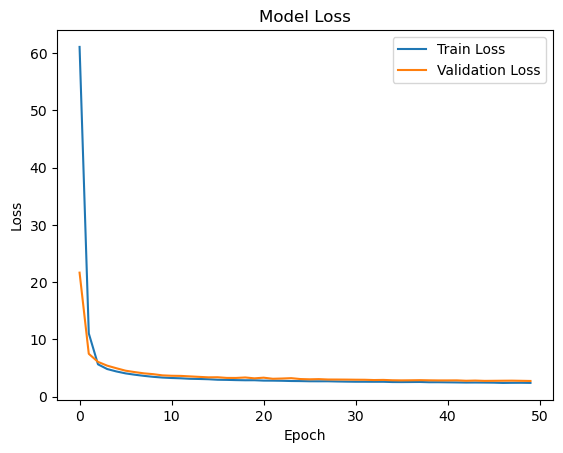

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error (MSE): 2.7498
Root Mean Squared Error (RMSE): 1.6582
R² Score: 0.7711
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE: 1.206


In [21]:
import matplotlib.pyplot as plt


# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 성능 평가
y_pred = model.predict([X_test,X_test]).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

yhat = model.predict([X_test,X_test])
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)